<a href="https://colab.research.google.com/github/bjih1999/cifar_img_classify_project/blob/master/plz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from keras.utils import np_utils

In [ ]:
def show_accuracy(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
 
    loss=history.history['loss']
    val_loss=history.history['val_loss']
 
    epochs_range = range(epochs)
    # epochs_range = range(epochs*5)
 
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
 
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [ ]:
def load_image_and_label_regularated():
    (train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
    train_images = train_images.reshape((50000, 32, 32, 3))
    test_images = test_images.reshape((10000, 32, 32, 3))
    train_images, test_images = train_images / 255.0, test_images / 255.0
    return (train_images, train_labels), (test_images, test_labels)

In [ ]:
input_shape = (32, 32, 3)
num_classes = 10
epochs = 10
batch_size = 512

**cifar 10 raw data**

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
 
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [ ]:
model = keras.Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
result1 = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)
model.summary()

Epoch 1/10
98/98 [==============================] - 1s 10ms/step - loss: 6.2940 - accuracy: 0.2857 - val_loss: 1.5818 - val_accuracy: 0.4385
Epoch 2/10
98/98 [==============================] - 1s 8ms/step - loss: 1.4854 - accuracy: 0.4725 - val_loss: 1.4253 - val_accuracy: 0.4976
Epoch 3/10
98/98 [==============================] - 1s 8ms/step - loss: 1.3156 - accuracy: 0.5330 - val_loss: 1.3053 - val_accuracy: 0.5425
Epoch 4/10
98/98 [==============================] - 1s 8ms/step - loss: 1.1900 - accuracy: 0.5797 - val_loss: 1.2532 - val_accuracy: 0.5654
Epoch 5/10
98/98 [==============================] - 1s 8ms/step - loss: 1.0784 - accuracy: 0.6206 - val_loss: 1.2217 - val_accuracy: 0.5737
Epoch 6/10
98/98 [==============================] - 1s 8ms/step - loss: 0.9879 - accuracy: 0.6525 - val_loss: 1.2134 - val_accuracy: 0.5816
Epoch 7/10
98/98 [==============================] - 1s 8ms/step - loss: 0.9099 - accuracy: 0.6808 - val_loss: 1.2314 - val_accuracy: 0.5830
Epoch 8/10
98/98 [=

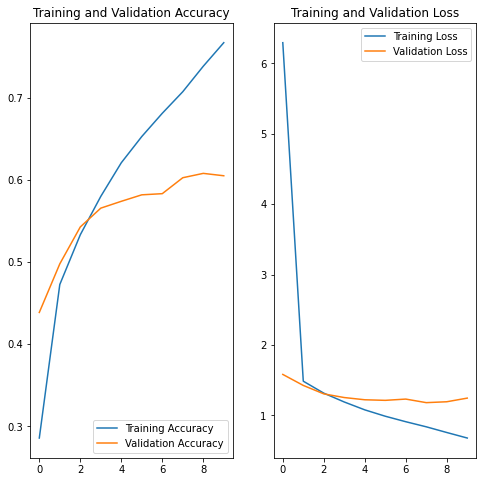

In [ ]:
show_accuracy(result1)

**cifar 10 divided by 255**

In [ ]:
(x_train, y_train), (x_test, y_test) = load_image_and_label_regularated()

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)



In [ ]:
model = keras.Sequential([
    layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
result2 = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)
model.summary()

Epoch 1/10
98/98 [==============================] - 2s 12ms/step - loss: 1.7744 - accuracy: 0.3648 - val_loss: 1.5251 - val_accuracy: 0.4587
Epoch 2/10
98/98 [==============================] - 1s 10ms/step - loss: 1.4293 - accuracy: 0.4915 - val_loss: 1.3957 - val_accuracy: 0.5066
Epoch 3/10
98/98 [==============================] - 1s 10ms/step - loss: 1.2924 - accuracy: 0.5437 - val_loss: 1.2378 - val_accuracy: 0.5654
Epoch 4/10
98/98 [==============================] - 1s 10ms/step - loss: 1.1882 - accuracy: 0.5823 - val_loss: 1.1539 - val_accuracy: 0.5942
Epoch 5/10
98/98 [==============================] - 1s 10ms/step - loss: 1.1120 - accuracy: 0.6084 - val_loss: 1.1079 - val_accuracy: 0.6100
Epoch 6/10
98/98 [==============================] - 1s 10ms/step - loss: 1.0494 - accuracy: 0.6313 - val_loss: 1.0444 - val_accuracy: 0.6327
Epoch 7/10
98/98 [==============================] - 1s 10ms/step - loss: 0.9900 - accuracy: 0.6519 - val_loss: 1.0292 - val_accuracy: 0.6345
Epoch 8/10
98

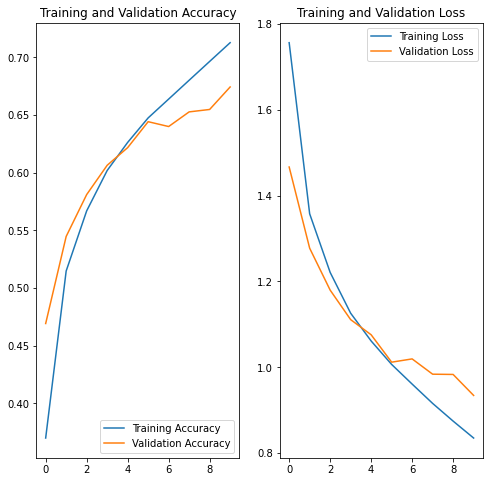

In [ ]:
show_accuracy(result2)

**cifar 10 regularated**


In [ ]:
mean=[0,0,0]
std=[0,0,0]
newX_train = np.ones(x_train.shape)
newX_test = np.ones(x_test.shape)
 
for i in range(3):
    mean[i] = np.mean(x_train[:,:,:,i])
    std[i] = np.std(x_train[:,:,:,i])
 
for i in range(3):
    newX_train[:,:,:,i] = x_train[:,:,:,i] - mean[i]
    newX_train[:,:,:,i] = newX_train[:,:,:,i] / std[i]
    newX_test[:,:,:,i] = x_test[:,:,:,i] - mean[i]
    newX_test[:,:,:,i] = newX_test[:,:,:,i] / std[i]
        
x_train = newX_train
x_test = newX_test

In [ ]:
model = keras.Sequential([
    layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
result3 = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)
model.summary()

Epoch 1/10
98/98 [==============================] - 2s 15ms/step - loss: 1.6047 - accuracy: 0.4290 - val_loss: 1.3565 - val_accuracy: 0.5231
Epoch 2/10
98/98 [==============================] - 1s 11ms/step - loss: 1.2265 - accuracy: 0.5654 - val_loss: 1.1515 - val_accuracy: 0.5933
Epoch 3/10
98/98 [==============================] - 1s 10ms/step - loss: 1.0743 - accuracy: 0.6224 - val_loss: 1.0832 - val_accuracy: 0.6177
Epoch 4/10
98/98 [==============================] - 1s 10ms/step - loss: 0.9724 - accuracy: 0.6610 - val_loss: 1.0337 - val_accuracy: 0.6341
Epoch 5/10
98/98 [==============================] - 1s 10ms/step - loss: 0.8892 - accuracy: 0.6903 - val_loss: 0.9372 - val_accuracy: 0.6757
Epoch 6/10
98/98 [==============================] - 1s 10ms/step - loss: 0.8196 - accuracy: 0.7163 - val_loss: 0.9396 - val_accuracy: 0.6755
Epoch 7/10
98/98 [==============================] - 1s 10ms/step - loss: 0.7596 - accuracy: 0.7359 - val_loss: 0.8871 - val_accuracy: 0.6924
Epoch 8/10
98

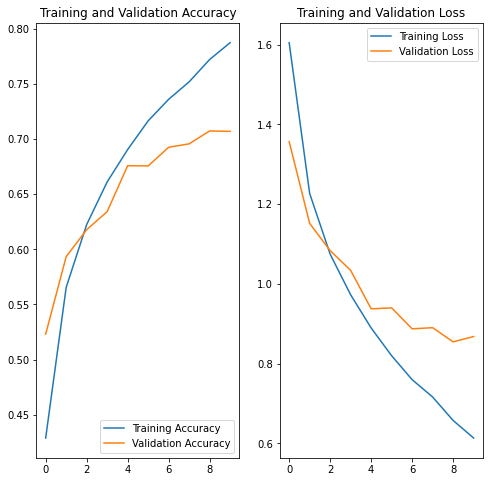

In [ ]:
show_accuracy(result3)

**필터 개수 점점 줄이기**

In [ ]:
model = keras.Sequential([
    layers.Conv2D(64, 3, padding='same', activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
result5 = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)
model.summary()

Epoch 1/10
98/98 [==============================] - 2s 15ms/step - loss: 1.6216 - accuracy: 0.4158 - val_loss: 1.3552 - val_accuracy: 0.5214
Epoch 2/10
98/98 [==============================] - 1s 13ms/step - loss: 1.2700 - accuracy: 0.5487 - val_loss: 1.2159 - val_accuracy: 0.5606
Epoch 3/10
98/98 [==============================] - 1s 13ms/step - loss: 1.1321 - accuracy: 0.5993 - val_loss: 1.1008 - val_accuracy: 0.6078
Epoch 4/10
98/98 [==============================] - 1s 14ms/step - loss: 1.0413 - accuracy: 0.6330 - val_loss: 1.0596 - val_accuracy: 0.6232
Epoch 5/10
98/98 [==============================] - 1s 13ms/step - loss: 0.9718 - accuracy: 0.6587 - val_loss: 0.9986 - val_accuracy: 0.6430
Epoch 6/10
98/98 [==============================] - 1s 13ms/step - loss: 0.9131 - accuracy: 0.6809 - val_loss: 1.0065 - val_accuracy: 0.6439
Epoch 7/10
98/98 [==============================] - 1s 13ms/step - loss: 0.8662 - accuracy: 0.6963 - val_loss: 0.9150 - val_accuracy: 0.6761
Epoch 8/10
98

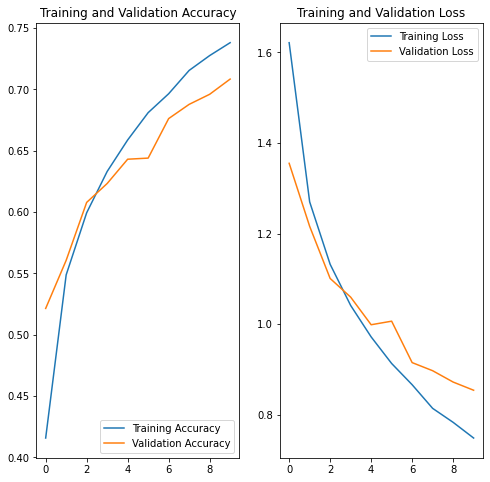

In [ ]:
show_accuracy(result5)

**레이어 추가**

In [ ]:
model = keras.Sequential([
    layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=input_shape),
    layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
result6 = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)
model.summary()

Epoch 1/10
98/98 [==============================] - 2s 19ms/step - loss: 1.6976 - accuracy: 0.3835 - val_loss: 1.3979 - val_accuracy: 0.4912
Epoch 2/10
98/98 [==============================] - 2s 17ms/step - loss: 1.2930 - accuracy: 0.5377 - val_loss: 1.1944 - val_accuracy: 0.5729
Epoch 3/10
98/98 [==============================] - 2s 16ms/step - loss: 1.1120 - accuracy: 0.6061 - val_loss: 1.0728 - val_accuracy: 0.6169
Epoch 4/10
98/98 [==============================] - 2s 16ms/step - loss: 0.9852 - accuracy: 0.6511 - val_loss: 0.9927 - val_accuracy: 0.6457
Epoch 5/10
98/98 [==============================] - 2s 17ms/step - loss: 0.9017 - accuracy: 0.6833 - val_loss: 0.9317 - val_accuracy: 0.6752
Epoch 6/10
98/98 [==============================] - 2s 16ms/step - loss: 0.8134 - accuracy: 0.7159 - val_loss: 0.8980 - val_accuracy: 0.6885
Epoch 7/10
98/98 [==============================] - 2s 16ms/step - loss: 0.7388 - accuracy: 0.7431 - val_loss: 0.8594 - val_accuracy: 0.7026
Epoch 8/10
98

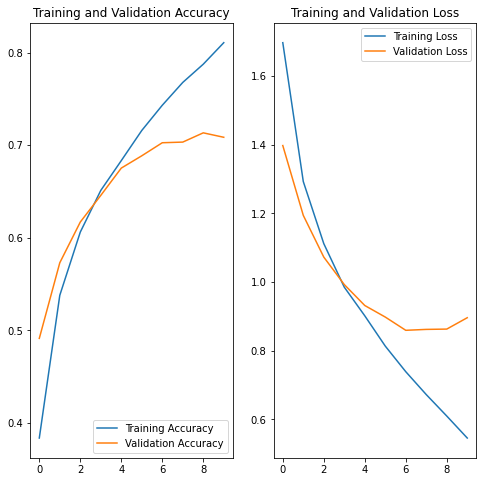

In [ ]:
show_accuracy(result6)

**레이어 더 추가**

In [ ]:
model = keras.Sequential([
    layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=input_shape),
    layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
result7 = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)
model.summary()

Epoch 1/10
98/98 [==============================] - 3s 25ms/step - loss: 1.7921 - accuracy: 0.3388 - val_loss: 1.4933 - val_accuracy: 0.4528
Epoch 2/10
98/98 [==============================] - 2s 22ms/step - loss: 1.3774 - accuracy: 0.4974 - val_loss: 1.2874 - val_accuracy: 0.5325
Epoch 3/10
98/98 [==============================] - 2s 22ms/step - loss: 1.1918 - accuracy: 0.5701 - val_loss: 1.1306 - val_accuracy: 0.5896
Epoch 4/10
98/98 [==============================] - 2s 22ms/step - loss: 1.0681 - accuracy: 0.6173 - val_loss: 1.0401 - val_accuracy: 0.6251
Epoch 5/10
98/98 [==============================] - 2s 22ms/step - loss: 0.9651 - accuracy: 0.6559 - val_loss: 0.9767 - val_accuracy: 0.6528
Epoch 6/10
98/98 [==============================] - 2s 22ms/step - loss: 0.8763 - accuracy: 0.6900 - val_loss: 0.9590 - val_accuracy: 0.6636
Epoch 7/10
98/98 [==============================] - 2s 22ms/step - loss: 0.8002 - accuracy: 0.7179 - val_loss: 0.8915 - val_accuracy: 0.6832
Epoch 8/10
98

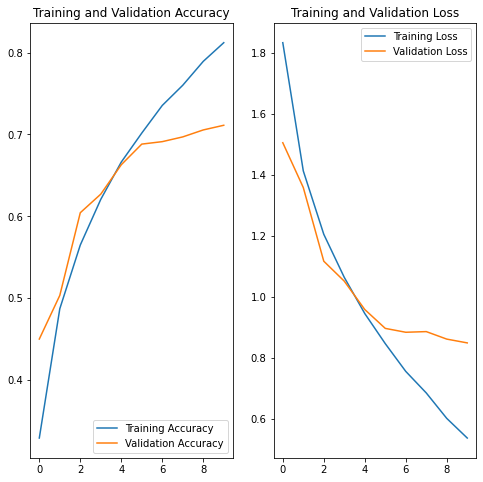

In [ ]:
show_accuracy(result7)

**#8 epoch 20**

In [ ]:
epochs = 20

In [ ]:
model = keras.Sequential([
    layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=input_shape),
    layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
result8 = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)
model.summary()

Epoch 1/20
98/98 [==============================] - 3s 24ms/step - loss: 1.8013 - accuracy: 0.3458 - val_loss: 1.4441 - val_accuracy: 0.4730
Epoch 2/20
98/98 [==============================] - 2s 22ms/step - loss: 1.3555 - accuracy: 0.5134 - val_loss: 1.2473 - val_accuracy: 0.5517
Epoch 3/20
98/98 [==============================] - 2s 22ms/step - loss: 1.1723 - accuracy: 0.5836 - val_loss: 1.1327 - val_accuracy: 0.5908
Epoch 4/20
98/98 [==============================] - 2s 22ms/step - loss: 1.0226 - accuracy: 0.6372 - val_loss: 1.0054 - val_accuracy: 0.6438
Epoch 5/20
98/98 [==============================] - 2s 22ms/step - loss: 0.9306 - accuracy: 0.6719 - val_loss: 0.9749 - val_accuracy: 0.6567
Epoch 6/20
98/98 [==============================] - 2s 22ms/step - loss: 0.8228 - accuracy: 0.7121 - val_loss: 0.9159 - val_accuracy: 0.6741
Epoch 7/20
98/98 [==============================] - 2s 22ms/step - loss: 0.7427 - accuracy: 0.7396 - val_loss: 0.8973 - val_accuracy: 0.6910
Epoch 8/20
98

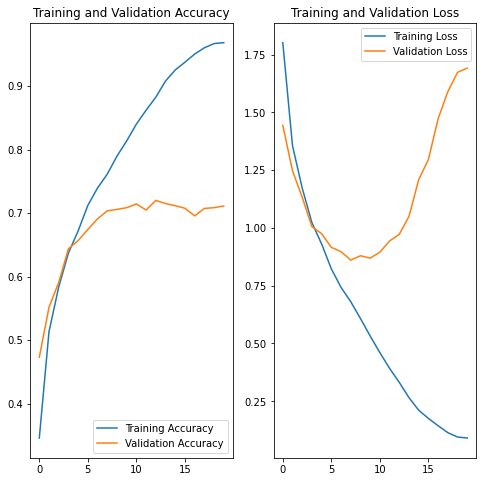

In [ ]:
show_accuracy(result8)

**#9 drop out 0.5**

In [ ]:
dropout = 0.5

In [ ]:
model = keras.Sequential([
    layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=input_shape),
    layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(dropout),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
result9 = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)
model.summary()

Epoch 1/20
98/98 [==============================] - 3s 25ms/step - loss: 1.8341 - accuracy: 0.3224 - val_loss: 1.5293 - val_accuracy: 0.4303
Epoch 2/20
98/98 [==============================] - 2s 22ms/step - loss: 1.4676 - accuracy: 0.4622 - val_loss: 1.3102 - val_accuracy: 0.5196
Epoch 3/20
98/98 [==============================] - 2s 22ms/step - loss: 1.3112 - accuracy: 0.5238 - val_loss: 1.1887 - val_accuracy: 0.5712
Epoch 4/20
98/98 [==============================] - 2s 22ms/step - loss: 1.1999 - accuracy: 0.5665 - val_loss: 1.1313 - val_accuracy: 0.5987
Epoch 5/20
98/98 [==============================] - 2s 22ms/step - loss: 1.1056 - accuracy: 0.6061 - val_loss: 1.0335 - val_accuracy: 0.6313
Epoch 6/20
98/98 [==============================] - 2s 22ms/step - loss: 1.0301 - accuracy: 0.6324 - val_loss: 0.9995 - val_accuracy: 0.6468
Epoch 7/20
98/98 [==============================] - 2s 22ms/step - loss: 0.9641 - accuracy: 0.6589 - val_loss: 0.9606 - val_accuracy: 0.6621
Epoch 8/20
98

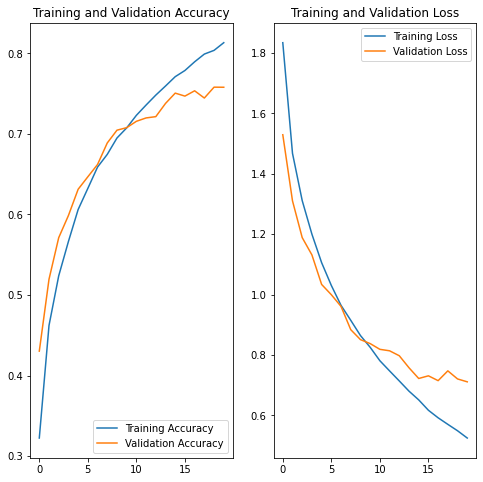

In [ ]:
show_accuracy(result9)

**#10 epochs 100**

In [ ]:
epochs=100

In [ ]:
 model = keras.Sequential([
    layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=input_shape),
    layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(dropout),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
result10 = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)
model.summary()

Epoch 1/100
98/98 [==============================] - 36s 45ms/step - loss: 1.8214 - accuracy: 0.3282 - val_loss: 1.4685 - val_accuracy: 0.4668
Epoch 2/100
98/98 [==============================] - 4s 37ms/step - loss: 1.4195 - accuracy: 0.4816 - val_loss: 1.2661 - val_accuracy: 0.5369
Epoch 3/100
98/98 [==============================] - 4s 37ms/step - loss: 1.2286 - accuracy: 0.5564 - val_loss: 1.1362 - val_accuracy: 0.5912
Epoch 4/100
98/98 [==============================] - 4s 37ms/step - loss: 1.0862 - accuracy: 0.6120 - val_loss: 1.0635 - val_accuracy: 0.6194
Epoch 5/100
98/98 [==============================] - 4s 37ms/step - loss: 1.0046 - accuracy: 0.6404 - val_loss: 1.0057 - val_accuracy: 0.6453
Epoch 6/100
98/98 [==============================] - 4s 37ms/step - loss: 0.9263 - accuracy: 0.6685 - val_loss: 0.9522 - val_accuracy: 0.6660
Epoch 7/100
98/98 [==============================] - 4s 38ms/step - loss: 0.8797 - accuracy: 0.6866 - val_loss: 0.8644 - val_accuracy: 0.6877
Epoch

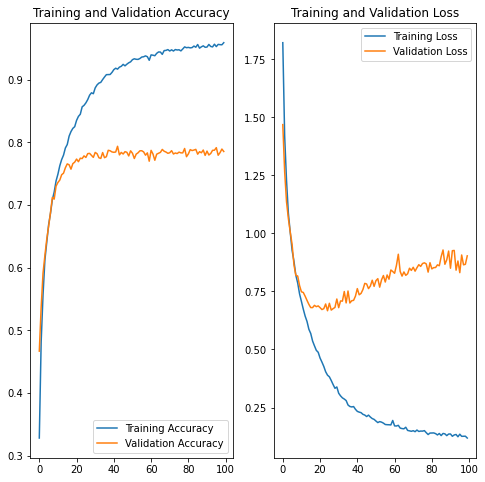

In [ ]:
show_accuracy(result10)